# Librerías

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from plotly import version
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from textblob import TextBlob
import re
import copy

# Carga de datos

In [67]:
df = pd.read_csv("../data/INvideos_cc50_202101.csv")

C:\Users\steph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.



# Inspección de datos

In [68]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011.0,243.0,149.0,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,FALSO,FALSO,FALSO,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353.0,1624.0,2684.0,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,FALSO,FALSO,FALSO,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492.0,293.0,66.0,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,FALSO,FALSO,FALSO,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38528,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291.0,404.0,196.0,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,FALSO,FALSO,FALSO,PRG Music & RDC Rajasthani presents फेकू आशिक़...,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
38529,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726.0,478.0,1428.0,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,FALSO,FALSO,FALSO,"Flowers - A R Rahman Show,Book your Tickets He...",Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398)
38530,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216.0,453.0,697.0,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,FALSO,FALSO,FALSO,Subscribe to Mazhavil Manorama now for your da...,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
38531,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698.0,115.0,65.0,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,FALSO,FALSO,FALSO,Nuabohu : Story of a rustic village girl who w...,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291)


In [69]:
df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011.0,243.0,149.0,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,FALSO,FALSO,FALSO,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353.0,1624.0,2684.0,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,FALSO,FALSO,FALSO,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492.0,293.0,66.0,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,FALSO,FALSO,FALSO,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38528 non-null  object 
 1   trending_date           37617 non-null  object 
 2   title                   37535 non-null  object 
 3   channel_title           37422 non-null  object 
 4   category_id             37389 non-null  object 
 5   publish_time            37376 non-null  object 
 6   tags                    37364 non-null  object 
 7   views                   37357 non-null  object 
 8   likes                   37352 non-null  float64
 9   dislikes                37352 non-null  float64
 10  comment_count           37352 non-null  float64
 11  thumbnail_link          37352 non-null  object 
 12  comments_disabled       37352 non-null  object 
 13  ratings_disabled        37352 non-null  object 
 14  video_error_or_removed  37352 non-null

In [71]:
df.describe()

,likes,dislikes,comment_count,lat,lon
count,3.735200e+04,3.735200e+04,37352.00000,38533.000000,38533.000000
mean,2.708272e+04,1.665082e+03,2676.99743,22.659994,82.153458
std,9.714510e+04,1.607617e+04,14868.31713,6.806052,7.461992
min,0.000000e+00,0.000000e+00,0.00000,8.900373,72.636867
25%,8.640000e+02,1.080000e+02,81.00000,19.250232,76.569993
50%,3.069000e+03,3.260000e+02,329.00000,23.835404,78.570026
75%,1.377425e+04,1.019250e+03,1285.00000,27.333330,88.616647
max,2.912710e+06,1.545017e+06,827755.00000,34.299959,94.216667


True


<AxesSubplot:>

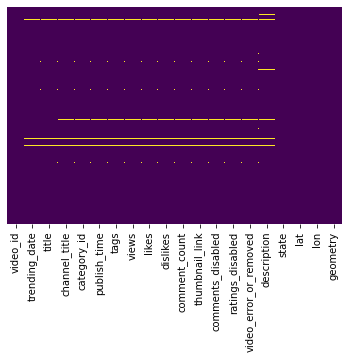

In [72]:
print(df.isnull().any().any())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Pre-proceso de datos

### Datos innecesarios

In [73]:
df.drop(columns = ["title", "publish_time","tags", "thumbnail_link", "video_error_or_removed", "description" ], 
        axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           38528 non-null  object 
 1   trending_date      37617 non-null  object 
 2   channel_title      37422 non-null  object 
 3   category_id        37389 non-null  object 
 4   views              37357 non-null  object 
 5   likes              37352 non-null  float64
 6   dislikes           37352 non-null  float64
 7   comment_count      37352 non-null  float64
 8   comments_disabled  37352 non-null  object 
 9   ratings_disabled   37352 non-null  object 
 10  state              38533 non-null  object 
 11  lat                38533 non-null  float64
 12  lon                38533 non-null  float64
 13  geometry           38533 non-null  object 
dtypes: float64(5), object(9)
memory usage: 4.1+ MB


### Datos erróneos

In [74]:
df['video_id_length']  = df['video_id'].str.len()
df = df[df['video_id_length'] == 11]
df.drop(columns = ["video_id_length"], axis = 1, inplace = True)

### Tipos de datos modificados

In [75]:
df['video_id'] = df['video_id'].astype('string')
df['trending_date'] = df['trending_date'].astype('string')
df['channel_title'] = df['channel_title'].astype('string')
df['comments_disabled'] = df['comments_disabled'].astype('string')
df['ratings_disabled'] = df['ratings_disabled'].astype('string')
df['views'] = df['views'].astype('int32')
df['likes'] = df['likes'].astype('int32')
df['dislikes'] = df['dislikes'].astype('int32')
df['comment_count'] = df['comment_count'].astype('int32')
df['category_id'] = df['category_id'].astype('float64')
df['category_id'] = df['category_id'].astype('int32')
df['category_id'] = df['category_id'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36834 entries, 0 to 38532
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   video_id           36834 non-null  string 
 1   trending_date      36834 non-null  string 
 2   channel_title      36834 non-null  string 
 3   category_id        36834 non-null  string 
 4   views              36834 non-null  int32  
 5   likes              36834 non-null  int32  
 6   dislikes           36834 non-null  int32  
 7   comment_count      36834 non-null  int32  
 8   comments_disabled  36834 non-null  string 
 9   ratings_disabled   36834 non-null  string 
 10  state              36834 non-null  object 
 11  lat                36834 non-null  float64
 12  lon                36834 non-null  float64
 13  geometry           36834 non-null  object 
dtypes: float64(2), int32(4), object(2), string(6)
memory usage: 3.7+ MB


In [76]:
td = []

for item in df["trending_date"]:
    date = f"20{item[:2]}/{item[6:]}/{item[3:5]}"    
    td.append(date)
    
df['trending_date'] = td
df

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry
0,kzwfHumJyYc,2017/11/14,Lokdhun Punjabi,1,1096327,33966,798,882,FALSO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,2017/11/14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,2017/11/14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,2017/11/14,Eruma Saani,23,1242680,70353,1624,2684,FALSO,FALSO,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,2017/11/14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38528,iNHecA3PJCo,2018/06/14,RDC Rajasthani,23,214378,3291,404,196,FALSO,FALSO,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
38529,dpPmPbhcslM,2018/06/14,Flowers TV,24,406828,1726,478,1428,FALSO,FALSO,Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398)
38530,mV6aztP58f8,2018/06/14,Mazhavil Manorama,24,386319,1216,453,697,FALSO,FALSO,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
38531,qxqDNP1bDEw,2018/06/14,Tarang TV,24,130263,698,115,65,FALSO,FALSO,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291)


In [77]:
df['trending_date']= pd.to_datetime(df['trending_date'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36834 entries, 0 to 38532
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           36834 non-null  string        
 1   trending_date      36834 non-null  datetime64[ns]
 2   channel_title      36834 non-null  string        
 3   category_id        36834 non-null  string        
 4   views              36834 non-null  int32         
 5   likes              36834 non-null  int32         
 6   dislikes           36834 non-null  int32         
 7   comment_count      36834 non-null  int32         
 8   comments_disabled  36834 non-null  string        
 9   ratings_disabled   36834 non-null  string        
 10  state              36834 non-null  object        
 11  lat                36834 non-null  float64       
 12  lon                36834 non-null  float64       
 13  geometry           36834 non-null  object        
dtypes: dat

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry
0,kzwfHumJyYc,2017-11-14,Lokdhun Punjabi,1,1096327,33966,798,882,FALSO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,2017-11-14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,2017-11-14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,2017-11-14,Eruma Saani,23,1242680,70353,1624,2684,FALSO,FALSO,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,2017-11-14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38528,iNHecA3PJCo,2018-06-14,RDC Rajasthani,23,214378,3291,404,196,FALSO,FALSO,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
38529,dpPmPbhcslM,2018-06-14,Flowers TV,24,406828,1726,478,1428,FALSO,FALSO,Punjab,31.519974,75.980003,POINT (75.98000281 31.51997398)
38530,mV6aztP58f8,2018-06-14,Mazhavil Manorama,24,386319,1216,453,697,FALSO,FALSO,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
38531,qxqDNP1bDEw,2018-06-14,Tarang TV,24,130263,698,115,65,FALSO,FALSO,Andhra Pradesh,14.750429,78.570026,POINT (78.57002559 14.7504291)


### Datos NA

False


<AxesSubplot:>

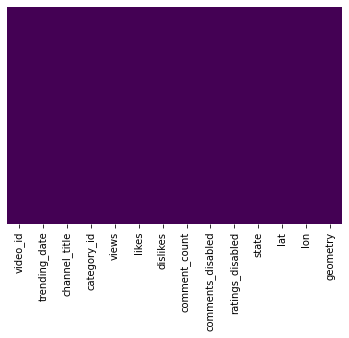

In [78]:
print(df.isnull().any().any())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Outliers

In [79]:
df.describe()

,views,likes,dislikes,comment_count,lat,lon
count,3.683400e+04,3.683400e+04,3.683400e+04,36834.000000,36834.000000,36834.000000
mean,1.054573e+06,2.698694e+04,1.666987e+03,2677.889423,22.667371,82.142934
std,3.180225e+06,9.741965e+04,1.618363e+04,14957.123595,6.806044,7.457556
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,8.900373,72.636867
25%,1.237612e+05,8.640000e+02,1.080000e+02,81.000000,19.250232,76.569993
50%,3.039550e+05,3.072000e+03,3.260000e+02,330.000000,23.835404,78.570026
75%,7.984620e+05,1.375800e+04,1.018000e+03,1280.000000,27.333330,88.616647
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,34.299959,94.216667


#### Views

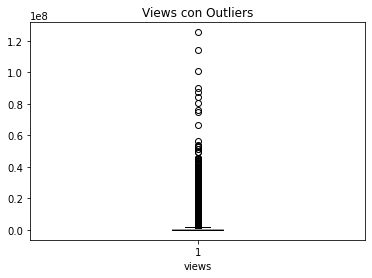

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df["views"],vert=True,patch_artist=True)
ax.set_title('Views con Outliers')
ax.set_xlabel('views')
plt.show()

In [81]:
Q3 = df['views'].quantile(0.75)
Q1 = df['views'].quantile(0.25)
Max = Q3 + 1.5 * (Q3 - Q1)

df = df[df['views'] <= Max]

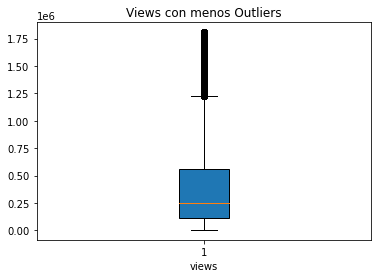

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df["views"],vert=True,patch_artist=True)
ax.set_title('Views con menos Outliers')
ax.set_xlabel('views')
plt.show()

#### Likes

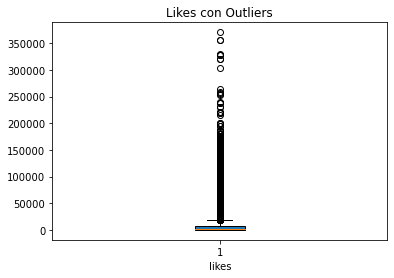

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df["likes"],vert=True,patch_artist=True)
ax.set_title('Likes con Outliers')
ax.set_xlabel('likes')
plt.show()

In [84]:
Q3 = df['likes'].quantile(0.75)
Q1 = df['likes'].quantile(0.25)
Max = Q3 + 1.5 * (Q3 - Q1)

df = df[df['likes'] <= Max]

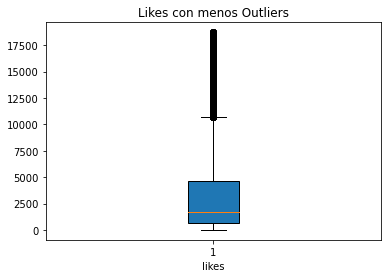

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df["likes"],vert=True,patch_artist=True)
ax.set_title('Likes con menos Outliers')
ax.set_xlabel('likes')
plt.show()

#### Dislikes

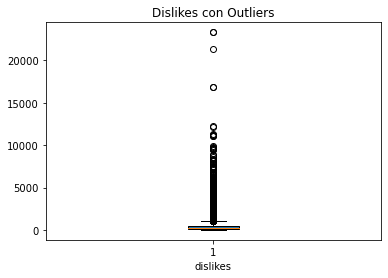

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df["dislikes"],vert=True,patch_artist=True)
ax.set_title('Dislikes con Outliers')
ax.set_xlabel('dislikes')
plt.show()

In [87]:
Q3 = df['dislikes'].quantile(0.75)
Q1 = df['dislikes'].quantile(0.25)
Max = Q3 + 1.5 * (Q3 - Q1)

df = df[df['dislikes'] <= Max]

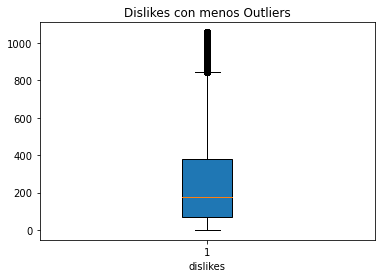

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df["dislikes"],vert=True,patch_artist=True)
ax.set_title('Dislikes con menos Outliers')
ax.set_xlabel('dislikes')
plt.show()

#### Comment_count

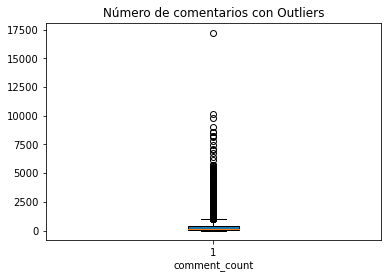

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df["comment_count"],vert=True,patch_artist=True)
ax.set_title('Número de comentarios con Outliers')
ax.set_xlabel('comment_count')
plt.show()

In [90]:
Q3 = df['comment_count'].quantile(0.75)
Q1 = df['comment_count'].quantile(0.25)
Max = Q3 + 1.5 * (Q3 - Q1)

df = df[df['comment_count'] <= Max]

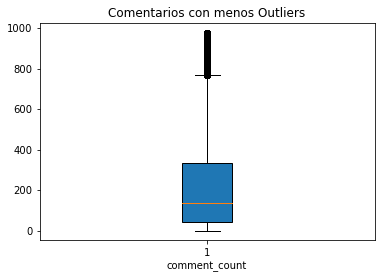

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df["comment_count"],vert=True,patch_artist=True)
ax.set_title('Comentarios con menos Outliers')
ax.set_xlabel('comment_count')
plt.show()

In [92]:
df.describe()

,views,likes,dislikes,comment_count,lat,lon
count,2.402100e+04,24021.000000,24021.000000,24021.000000,24021.000000,24021.000000
mean,2.648701e+05,2508.348237,240.785771,220.332084,22.666644,82.092181
std,2.605639e+05,3103.362200,235.405713,229.038243,6.812528,7.443850
min,4.024000e+03,0.000000,0.000000,0.000000,8.900373,72.636867
25%,8.493800e+04,500.000000,66.000000,41.000000,19.250232,76.569993
50%,1.759050e+05,1314.000000,157.000000,138.000000,23.835404,78.570026
75%,3.523970e+05,3232.000000,343.000000,332.000000,27.333330,88.616647
max,1.798754e+06,18681.000000,1058.000000,977.000000,34.299959,94.216667


### Incorporación de la columna de categoría

In [93]:
category = pd.read_json("../data/US_category_id.json")
category

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [94]:
print(category["items"][0])
print(category["items"][0]["id"])
print(category["items"][0]["snippet"]["title"])

{'kind': 'youtube#videoCategory', 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}
1
Film & Animation


In [95]:
d = {}

for item in category["items"]:    
    d[item["id"]] = item["snippet"]["title"]

print(d)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [96]:
df['category'] = df['category_id'].map(d)
df

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,category
1,zUZ1z7FwLc8,2017-11-14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),News & Politics
2,10L1hZ9qa58,2017-11-14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),Entertainment
4,kJzGH0PVQHQ,2017-11-14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),Entertainment
8,KObFEYCaRx8,2017-11-14,Top Telugu Media,24,118223,520,53,23,FALSO,FALSO,Andaman And Nicobar,11.667026,92.735983,POINT (92.73598262 11.66702557),Entertainment
12,Prb_osSVE0M,2017-11-14,ABN Telugu,25,156085,716,53,0,VERDADERO,FALSO,Manipur,24.799971,93.950017,POINT (93.95001705 24.79997072),News & Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38525,5gd1G0aeqtw,2018-06-14,Dreamz Unlimited,24,56313,6687,57,556,FALSO,FALSO,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349),Entertainment
38527,8aMckaI9k00,2018-06-14,Zakir Khan,22,274861,16448,183,834,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),People & Blogs
38528,iNHecA3PJCo,2018-06-14,RDC Rajasthani,23,214378,3291,404,196,FALSO,FALSO,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929),Comedy
38530,mV6aztP58f8,2018-06-14,Mazhavil Manorama,24,386319,1216,453,697,FALSO,FALSO,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129),Entertainment


### Exportación del archivo pre-procesado

In [97]:
df.to_csv('../data/export_dataframe.csv', index = False, header=True)

# Visualización de datos

### Leer archivo limpio

In [98]:
df_limpio = pd.read_csv("../data/export_dataframe.csv")
df_limpio

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,category
0,zUZ1z7FwLc8,2017-11-14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),News & Politics
1,10L1hZ9qa58,2017-11-14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),Entertainment
2,kJzGH0PVQHQ,2017-11-14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),Entertainment
3,KObFEYCaRx8,2017-11-14,Top Telugu Media,24,118223,520,53,23,FALSO,FALSO,Andaman And Nicobar,11.667026,92.735983,POINT (92.73598262 11.66702557),Entertainment
4,Prb_osSVE0M,2017-11-14,ABN Telugu,25,156085,716,53,0,VERDADERO,FALSO,Manipur,24.799971,93.950017,POINT (93.95001705 24.79997072),News & Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24016,5gd1G0aeqtw,2018-06-14,Dreamz Unlimited,24,56313,6687,57,556,FALSO,FALSO,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349),Entertainment
24017,8aMckaI9k00,2018-06-14,Zakir Khan,22,274861,16448,183,834,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),People & Blogs
24018,iNHecA3PJCo,2018-06-14,RDC Rajasthani,23,214378,3291,404,196,FALSO,FALSO,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929),Comedy
24019,mV6aztP58f8,2018-06-14,Mazhavil Manorama,24,386319,1216,453,697,FALSO,FALSO,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129),Entertainment


## Por categoría de videos

### 1.- ¿Qué categorías de videos son las de mayor tendencia?

In [99]:
counts1 = df_limpio["category"].value_counts()
counts1 = pd.DataFrame(counts1)
print(counts1)

data = [go.Bar(
    y = counts1['category'],
    x = counts1.index
)]
layout = go.Layout(
    title = 'Categorías por número de videos en tendencia',
    yaxis = dict(title = 'Número de videos en tendencia'),
    xaxis = dict(title = 'Categorías')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

                       category
Entertainment             11965
News & Politics            4202
People & Blogs             1991
Music                      1559
Comedy                     1239
Education                  1015
Film & Animation            812
Howto & Style               503
Sports                      376
Shows                       119
Nonprofits & Activism       103
Science & Technology         66
Autos & Vehicles             53
Gaming                        7
Travel & Events               7
Movies                        4


### 2.- ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

In [100]:
counts2 = df_limpio.groupby("category")
counts2a = pd.DataFrame(counts2.sum()["likes"])
counts2b = pd.DataFrame(counts2.sum()["dislikes"])

counts2a["dislikes"] = counts2b["dislikes"]
print(counts2a)

data = [go.Bar(
    name = 'Likes',
    y = counts2a['likes'],
    x = counts2a.index
    ),
    go.Bar(
    name = 'Dislikes',
    y = counts2a['dislikes'],
    x = counts2a.index
    )
]
layout = go.Layout(
    title = 'Categorías por número de likes y dislikes',
    yaxis = dict(title = 'Número de likes y dislikes'),
    xaxis = dict(title = 'Categorías')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

                          likes  dislikes
category                                 
Autos & Vehicles         127130     11797
Comedy                  6056816    366268
Education               2431722     96048
Entertainment          25918012   2886216
Film & Animation        3402832    289027
Gaming                    36428      3826
Howto & Style           1187339    133662
Movies                    22406       747
Music                   9243803    482643
News & Politics         6023716    852615
Nonprofits & Activism    134995      6776
People & Blogs          3853299    452422
Science & Technology     222172     18378
Shows                    379838     77919
Sports                  1204878    105133
Travel & Events            7647       438


### 3.- ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

In [101]:
counts3 = df_limpio.groupby("category")
counts3a = pd.DataFrame(counts2.sum()["likes"])
counts3b = pd.DataFrame(counts2.sum()["dislikes"])

counts3c = pd.DataFrame()
counts3c["ratio"] = counts3a["likes"] / counts3b["dislikes"]
print(counts3c)

counts3c = counts3c.sort_values("ratio")

data = [go.Bar(
    y = counts3c['ratio'],
    x = counts3c.index
)]
layout = go.Layout(
    title = 'Categorías por proporción de "Likes" / "Dislikes"',
    yaxis = dict(title = 'Proporción de "Likes" / "Dislikes"'),
    xaxis = dict(title = 'Categorías')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

                           ratio
category                        
Autos & Vehicles       10.776469
Comedy                 16.536569
Education              25.317779
Entertainment           8.979928
Film & Animation       11.773405
Gaming                  9.521171
Howto & Style           8.883146
Movies                 29.994645
Music                  19.152465
News & Politics         7.064989
Nonprofits & Activism  19.922521
People & Blogs          8.517046
Science & Technology   12.089019
Shows                   4.874780
Sports                 11.460512
Travel & Events        17.458904


### 4.- ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

In [102]:
counts4 = df.groupby("category")
counts4a = pd.DataFrame(counts2.sum()["views"])
counts4b = pd.DataFrame(counts2.sum()["comment_count"])

counts4c = pd.DataFrame()
counts4c["ratio"] = counts4a["views"] / counts4b["comment_count"]
print(counts4c)

counts4c = counts4c.sort_values("ratio")

data = [go.Bar(
    y = counts4c['ratio'],
    x = counts4c.index
)]
layout = go.Layout(
    title = 'Categorías por proporción de "Vistas" / "Comentarios"',
    yaxis = dict(title = 'Proporción de "Vistas" / "Comentarios"'),
    xaxis = dict(title = 'Categorías')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

                             ratio
category                          
Autos & Vehicles       1116.981443
Comedy                  563.600310
Education               266.226830
Entertainment          1412.710799
Film & Animation       1361.563898
Gaming                 2262.441948
Howto & Style          1053.915889
Movies                  863.778185
Music                  1044.241955
News & Politics        1153.922069
Nonprofits & Activism  1337.306127
People & Blogs         1581.255467
Science & Technology    434.196160
Shows                  1617.356621
Sports                 1788.790647
Travel & Events        2606.820144


## Por el tiempo transcurrido

### 5.- ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

In [103]:
td = []

for item in df["trending_date"]:
    date = str(item)[:-12]        
    td.append(date)
    
df['trending_date2'] = td

In [104]:
counts5 = pd.DataFrame(df["trending_date2"].value_counts())
print(counts5)
df.drop(columns = ["trending_date2"], axis = 1, inplace = True)

data = [go.Bar(
    y = counts5['trending_date2'],
    x = counts5.index
)]
layout = go.Layout(
    title = 'Volumen de los videos en tendencia a lo largo del tiempo',
    yaxis = dict(title = 'Número de videos en tendencia'),
    xaxis = dict(title = 'Fecha de video en tendencia')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

         trending_date2
2017-12            4197
2018-01            3780
2018-03            3336
2018-02            3245
2018-05            3196
2018-04            2562
2017-11            2413
2018-06            1292


## Por canales de Youtube

### 6.-  ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

In [105]:
counts6 = pd.DataFrame(df["channel_title"].value_counts())
counts6a = counts6[:10]
counts6b = counts6[counts6["channel_title"]<2]

print(counts6)
print(counts6a)
print(counts6b)

                                       channel_title
etvteluguindia                                   263
RadaanMedia                                      240
SAB TV                                           228
Tarang TV                                        223
Vijay Television                                 213
...                                              ...
Samachar Plus                                      1
All Updates                                        1
ArkivaShqip                                        1
Tamil News World - தமிழ் செய்தி உலகம்              1
The Q                                              1

[1288 rows x 1 columns]
                    channel_title
etvteluguindia                263
RadaanMedia                   240
SAB TV                        228
Tarang TV                     223
Vijay Television              213
Study IQ education            205
V6 News Telugu                204
ETV Plus India                201
SunTV Tamil                   194

In [106]:
data = [go.Bar(
    y = counts6['channel_title'],
    x = counts6.index
)]
layout = go.Layout(
    title = 'Canales de Youtube según número de veces en tendencia',
    yaxis = dict(title = 'Número de veces en tendencia'),
    xaxis = dict(title = 'Canales de Youtube')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

In [107]:
data = [go.Bar(
    y = counts6a['channel_title'],
    x = counts6a.index
)]
layout = go.Layout(
    title = 'Canales de Youtube con más número de veces en tendencia',
    yaxis = dict(title = 'Número de veces en tendencia'),
    xaxis = dict(title = 'Canales de Youtube')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

In [108]:
data = [go.Bar(
    y = counts6b['channel_title'],
    x = counts6b.index
)]
layout = go.Layout(
    title = 'Canales de Youtube con menos número de veces en tendencia',
    yaxis = dict(title = 'Número de veces en tendencia'),
    xaxis = dict(title = 'Canales de Youtube')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

## Por la geografía del país

### 7.-  ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

In [109]:
counts7 = df.groupby("state")
counts7a = pd.DataFrame(counts7.sum()["likes"])
counts7b = pd.DataFrame(counts7.sum()["dislikes"])
counts7c = pd.DataFrame(counts7.sum()["views"])
counts7d = pd.DataFrame(counts7.mean()["lat"])
counts7e = pd.DataFrame(counts7.mean()["lon"])

counts7a["dislikes"] = counts7b["dislikes"]
counts7a["views"] = counts7c["views"]
counts7a["lat"] = counts7d["lat"]
counts7a["lon"] = counts7e["lon"]
print(counts7a)

                          likes  dislikes      views        lat        lon
state                                                                     
Andaman And Nicobar     1693191    172598  190657080  11.667026  92.735983
Andhra Pradesh          1781807    176545  191613075  14.750429  78.570026
Arunachal Pradesh       1875978    172015  194101469  27.100399  93.616601
Assam                   1855657    176570  186621215  26.749981  94.216667
Bihar                   1706301    165308  190600985  25.785414  87.479973
Chandigarh              1891158    167392  187845341  30.719997  76.780006
Chhattisgarh            1984944    175449  198949137  22.090420  82.159987
Dadra And Nagar Haveli  1788155    177832  191991552  20.266578  73.016618
Delhi                   1749301    169593  188193477  28.669993  77.230004
Goa                     1801974    185639  201749839  15.491997  73.818001
Haryana                 1889073    195224  210124265  28.450006  77.019991
Himachal Pradesh        1

In [110]:
fig = px.density_mapbox(
    counts7a,
    lat = 'lat',
    lon = 'lon',
    z = 'likes',
    color_continuous_scale='Inferno',
    hover_name = counts7a.index,
    radius = 30, zoom = 1, height = 600
)

fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout()
fig.show()

In [111]:
fig = px.density_mapbox(
    counts7a,
    lat = 'lat',
    lon = 'lon',
    z = 'dislikes',
    color_continuous_scale='Inferno',
    hover_name = counts7a.index,
    radius = 30, zoom = 1, height = 600
)

fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout()
fig.show()

In [112]:
fig = px.density_mapbox(
    counts7a,
    lat = 'lat',
    lon = 'lon',
    z = 'views',
    color_continuous_scale='Inferno',
    hover_name = counts7a.index,
    radius = 30, zoom = 1, height = 600
)

fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout()
fig.show()

# Modelizar y evaluar los datos

### 1.- ¿Es factible predecir el número de "Vistas" o "Me gusta" o "No me gusta"?

#### Predicción de views

In [113]:
X = df_limpio[['likes', 'dislikes']]
y = df_limpio['views']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [115]:
lm = LinearRegression()

In [116]:
lm.fit(X_train,y_train)

LinearRegression()

In [117]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
likes,11.031323
dislikes,705.116439


#### Predicción de likes

In [118]:
X = df_limpio[['views', 'dislikes']]
y = df_limpio['likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()

lm.fit(X_train,y_train)

coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
views,0.002116
dislikes,5.085770


#### Predicción de dislikes

In [119]:
X = df_limpio[['likes', 'views']]
y = df_limpio['dislikes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()

lm.fit(X_train,y_train)

coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
likes,0.019595
views,0.000521


### 2.- ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

In [120]:
df_limpio_aux = copy.deepcopy(df_limpio)

In [121]:
polaridad = []
for index, row in df_limpio_aux.iterrows():
    if row['likes'] > row['dislikes']:
        polaridad.append('positivo')
    elif row['comment_count'] == 0 or row['likes'] == row['dislikes']:
        polaridad.append('Neutro')
    else:
        polaridad.append('negativo')

In [122]:
df_limpio_aux['polaridad'] = np.array([pol for pol in polaridad])

In [123]:
df_limpio_aux.head(10)

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,state,lat,lon,geometry,category,polaridad
0,zUZ1z7FwLc8,2017-11-14,HJ NEWS,25,590101,735,904,0,VERDADERO,FALSO,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),News & Politics,Neutro
1,10L1hZ9qa58,2017-11-14,TFPC,24,473988,2011,243,149,FALSO,FALSO,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),Entertainment,positivo
2,kJzGH0PVQHQ,2017-11-14,Filmylooks,24,464015,492,293,66,FALSO,FALSO,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),Entertainment,positivo
3,KObFEYCaRx8,2017-11-14,Top Telugu Media,24,118223,520,53,23,FALSO,FALSO,Andaman And Nicobar,11.667026,92.735983,POINT (92.73598262 11.66702557),Entertainment,positivo
4,Prb_osSVE0M,2017-11-14,ABN Telugu,25,156085,716,53,0,VERDADERO,FALSO,Manipur,24.799971,93.950017,POINT (93.95001705 24.79997072),News & Politics,positivo
5,KHxdrECEsD0,2017-11-14,The Voice India Kids,24,472413,2611,250,174,FALSO,FALSO,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895),Entertainment,positivo
6,7gShaSuK_PY,2017-11-14,Next Gen,22,89531,238,59,18,FALSO,FALSO,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105),People & Blogs,positivo
7,0SMKG3SRGzQ,2017-11-14,TV9 Telugu,19,176472,588,52,23,FALSO,FALSO,Uttar Pradesh,27.599981,78.050006,POINT (78.05000565 27.59998069),Travel & Events,positivo
8,znOC3IU0dF8,2017-11-14,News Mantra,24,55178,45,94,15,FALSO,FALSO,Rajasthan,26.449999,74.639981,POINT (74.63998124 26.44999921),Entertainment,negativo
9,z3V9LUA6VQM,2017-11-14,OmFut,24,236710,858,197,66,FALSO,FALSO,Rajasthan,26.449999,74.639981,POINT (74.63998124 26.44999921),Entertainment,positivo


#### Mayor tendencia

In [124]:
mayor_tendencia = df_limpio_aux.sort_values(by = 'views', ascending = False).head(100)

In [125]:
mayor = mayor_tendencia['polaridad'].value_counts()
mayor = pd.DataFrame(mayor)
mayor

,polaridad
positivo,84
Neutro,16


In [126]:
data = [go.Bar(
    y = mayor['polaridad'],
    x = mayor.index
)]
layout = go.Layout(
    title = 'Tipos de comentario por video en mayor tendencia',
    yaxis = dict(title = 'Número de videos en mayor tendencia'),
    xaxis = dict(title = 'Tipo de comentario')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

#### Menor tendencia

In [127]:
menor_tendencia = df_limpio_aux.sort_values(by = 'views').head(100)

In [128]:
menor = menor_tendencia['polaridad'].value_counts()
menor = pd.DataFrame(menor)
menor

,polaridad
positivo,94
Neutro,5
negativo,1


In [129]:
data = [go.Bar(
    y = menor['polaridad'],
    x = menor.index
)]
layout = go.Layout(
    title = 'Tipos de comentario por video en menor tendencia',
    yaxis = dict(title = 'Número de videos en menor tendencia'),
    xaxis = dict(title = 'Tipo de comentario')
)

fig = go.Figure(data = data, layout = layout)

fig.iplot()

# Todo está explicado en el doc para mejor entendimiento y organización